In [40]:
#import相关的库
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
#数据读入使用pd.read_csv()
data_01 = pd.read_csv('data_01.csv')
data_02 = pd.read_csv('data_02.csv')
data_03 = pd.read_csv('data_03.csv')

In [42]:
data:pd.DataFrame= pd.concat([data_01,data_02,data_03])

In [43]:
#查看前5行数据
data.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-Jun-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-Jun-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,1-Aug-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-Jun-11


In [44]:
#查看数据的信息，包括每个字段的名称、非空数量、字段的数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001732 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001732 non-null object
contbr_nm            1001732 non-null object
contbr_st            1001728 non-null object
contbr_employer      988003 non-null object
contbr_occupation    993302 non-null object
contb_receipt_amt    1001732 non-null float64
contb_receipt_dt     1001732 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [45]:
#用统计学指标快速描述数据的概要
data.describe()

,contb_receipt_amt
count,1.001732e+06
mean,2.982358e+02
std,3.749665e+03
min,-3.080000e+04
25%,3.500000e+01
50%,1.000000e+02
75%,2.500000e+02
max,2.014491e+06


In [46]:
#从data.info()得知，contbr_employer、contbr_occupation均有少量缺失值,均填充为NOT PROVIDED
data['contbr_employer'].fillna('NOT PROVIDED',inplace=True)
data['contbr_occupation'].fillna('NOT PROVIDED',inplace=True)

In [47]:
#查看数据中总统候选人都有谁
print('共有{}位候选人，分别是：{}'.format(len(data['cand_nm'].unique()),data['cand_nm'].unique()))


共有13位候选人，分别是：['Bachmann, Michelle' 'Romney, Mitt' 'Obama, Barack'
 "Roemer, Charles E. 'Buddy' III" 'Pawlenty, Timothy' 'Johnson, Gary Earl'
 'Paul, Ron' 'Santorum, Rick' 'Cain, Herman' 'Gingrich, Newt'
 'McCotter, Thaddeus G' 'Huntsman, Jon' 'Perry, Rick']


In [48]:
#通过搜索引擎等途径，获取到每个总统候选人的所属党派，建立字典parties，候选人名字作为键，所属党派作为对应的值
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [49]:
#通过map映射函数，增加一列party存储党派信息
data['party']=data['cand_nm'].map(parties)
#查看两个党派的情况
data['party'].value_counts()

Democrat      593747
Republican    407985
Name: party, dtype: int64

In [50]:
data.groupby('party')['contb_receipt_amt'].sum()

party
Democrat      1.335028e+08
Republican    1.652496e+08
Name: contb_receipt_amt, dtype: float64

In [51]:
data.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending=False)[:20]

contbr_occupation
RETIRED                                   48176397.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
PHYSICIAN                                  7224044.40
PRESIDENT                                  6347843.59
EXECUTIVE                                  5273717.90
CONSULTANT                                 4932627.98
NOT PROVIDED                               4224760.39
CEO                                        3570942.20
LAWYER                                     3537982.19
OWNER                                      3278488.16
INVESTOR                                   3204481.92
ENGINEER                                   2730527.43
PROFESSOR                                  2458033.81
C.E.O.                                     2433218.11
SELF-EMPLOYED                              2259150.94
MANAGER   

In [52]:
#建立一个职业对应字典，把相同职业的不同表达映射为对应的职业，比如把C.E.O.映射为CEO
occupation_map = {
  'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
  'INFORMATION REQUESTED':'NOT PROVIDED',
  'SELF' : 'SELF-EMPLOYED',
  'SELF EMPLOYED' : 'SELF-EMPLOYED',
  'C.E.O.':'CEO',
  'LAWYER':'ATTORNEY',
}

# 如果不在字典中,返回x
f = lambda x: occupation_map.get(x, x)
data.contbr_occupation = data.contbr_occupation.map(f)

In [53]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
data.contbr_employer = data.contbr_employer.map(f)

In [54]:
data = data[data['contb_receipt_amt']>0]

In [55]:
#查看各候选人获得的赞助总金额
data.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending=False)

cand_nm
Obama, Barack                     1.358776e+08
Romney, Mitt                      8.833591e+07
Paul, Ron                         2.100962e+07
Perry, Rick                       2.030675e+07
Gingrich, Newt                    1.283277e+07
Santorum, Rick                    1.104316e+07
Cain, Herman                      7.101082e+06
Pawlenty, Timothy                 6.004819e+06
Huntsman, Jon                     3.330373e+06
Bachmann, Michelle                2.711189e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.730099e+05
McCotter, Thaddeus G              3.903000e+04
Name: contb_receipt_amt, dtype: float64

In [56]:
#选取候选人为Obama、Romney的子集数据
data_vs = data[data['cand_nm'].isin(['Obama, Barack','Romney, Mitt'])].copy()

In [57]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(data_vs['contb_receipt_amt'],bins)
labels

410           (10, 100]
411         (100, 1000]
412         (100, 1000]
413           (10, 100]
414           (10, 100]
415           (10, 100]
416         (100, 1000]
417           (10, 100]
418         (100, 1000]
419           (10, 100]
420           (10, 100]
421         (100, 1000]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426       (1000, 10000]
427         (100, 1000]
428         (100, 1000]
429           (10, 100]
430       (1000, 10000]
431         (100, 1000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436           (10, 100]
437         (100, 1000]
438         (100, 1000]
439           (10, 100]
              ...      
201356        (10, 100]
201357          (1, 10]
201358        (10, 100]
201359        (10, 100]
201360        (10, 100]
201361        (10, 100]
201362      (100, 1000]
201363        (10, 100]
201364        (10, 100]
201365        (10, 100]
201366        (1

In [58]:
#按照党派、职业对赞助金额进行汇总，类似excel中的透视表操作，聚合函数为sum
by_occupation = data.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')
#过滤掉赞助金额小于200W的数据
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,14302461.84,7.868419e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
MANAGER,762883.22,1.444532e+06
NOT PROVIDED,13725187.32,2.097161e+07


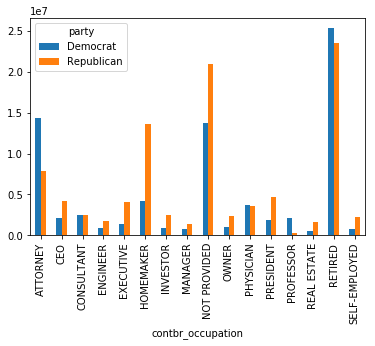

In [59]:
over_2mm.plot(kind='bar')

In [60]:
#由于职业和雇主的处理非常相似，我们定义函数get_top_amounts()对两个字段进行分析处理

def get_top_amounts(group,key,n=5):
#传入groupby分组后的对象，返回按照key字段汇总的排序前n的数据
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]
  
grouped = data_vs.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305316.38
               ATTORNEY             14302461.84
               NOT PROVIDED         13725187.32
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               CONSULTANT            2459912.71
               PROFESSOR             2165071.08
Romney, Mitt   NOT PROVIDED         11638509.84
               RETIRED              11508473.59
               HOMEMAKER             8147446.22
               ATTORNEY              5372424.02
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [61]:
#同样的，使用get_top_amounts()对雇主进行分析处理
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694558.85
               SELF-EMPLOYED         18626807.16
               NOT PROVIDED          13883494.03
               NOT EMPLOYED           8586308.70
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12321731.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

In [74]:
#labels是之前赞助金额离散化后的Series
grouped_bins = data_vs.groupby(['cand_nm',labels])
grouped_bins.size().unstack(0)

ValueError: cannot reindex from a duplicate axis

In [64]:
bucket_sums=grouped_bins['contb_receipt_amt'].sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798731.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [65]:
bucket_sums=grouped_bins['contb_receipt_amt'].sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798731.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


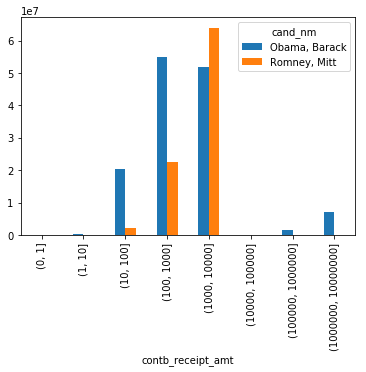

In [66]:
#Obama、Romney各区间赞助总金额
bucket_sums.plot(kind='bar')

In [67]:
#算出每个区间两位候选人收到赞助总金额的占比
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710177,0.289823
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


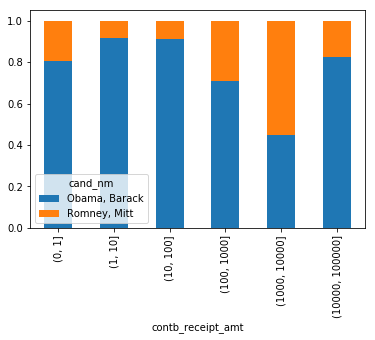

In [68]:
#使用柱状图，指定stacked=True进行堆叠，即可完成百分比堆积图
normed_sums[:-2].plot(kind='bar',stacked=True)

In [69]:
data.groupby('contbr_nm')['contbr_nm'].count().sort_values(ascending=False)[:20]

contbr_nm
WILLIAMS, DEBBY          205
BERKE, DAVID MICHAEL     171
SEBAG, DAVID             161
SMITH, ERIK              145
FALLSGRAFF, TOBY         138
SKINNER, DONNA           136
CASPERSON, CAROLINA      132
HARRIS, CLAUDIA W.       132
ROSBERG, MARILYN         115
POTTS, LILLIE            114
DUDLEY, DEBBIE           111
HAUGHEY, NOEL ANTHONY    107
DFHDFH, DFHDFH            96
SHERWIN, GLEN R.          94
MITCHELL, CAITLIN         90
SMITH, CHARLES            88
NURU, ISAAC               87
KARIMIAN, AFSANEH         87
BIRMINGHAM, TOM           85
MASTERS, MARGERY          85
Name: contbr_nm, dtype: int64

In [ ]:
data_vs['time'] = pd.to_datetime(data_vs['contb_receipt_dt'])

In [ ]:
data_vs.set_index('time',inplace=True)
data_vs.head()

In [ ]:
vs_time = data_vs.groupby('cand_nm').resample('M')['cand_nm'].count()
vs_time.unstack(0)

In [ ]:
fig1, ax1=plt.subplots(figsize=(32,8))
vs_time.unstack(0).plot(kind='area',ax=ax1,alpha=0.6)
plt.show()